In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X,y)

pred = knn.predict(X)

accuracy_score(y, pred)

1.0

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.5, 
                                                    random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 4)
(75, 4)
(75,)
(75,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

accuracy_score(y_test, pred)

0.9066666666666666

In [11]:
from sklearn.metrics import classification_report

# labels need to in list, ori in np arrat, so tolist()
print(classification_report(y_test, pred, labels=knn.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.85      0.93      0.89        30
           2       0.90      0.79      0.84        24

    accuracy                           0.91        75
   macro avg       0.92      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



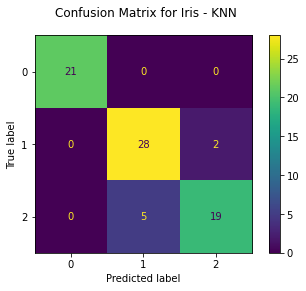

In [14]:
from sklearn.metrics import plot_confusion_matrix

# this one np array ok
fig = plot_confusion_matrix(knn, X_test, y_test, display_labels=knn.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris - KNN")
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=2,
                           min_samples_leaf=4,
                           random_state=42)

dt.fit(X_train,y_train)

pred = dt.predict(X_test)

accuracy_score(y_test, pred)

0.8933333333333333

In [15]:
print(classification_report(y_test, pred, labels=dt.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.81      0.97      0.88        30
           2       0.94      0.71      0.81        24

    accuracy                           0.89        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.90      0.89      0.89        75



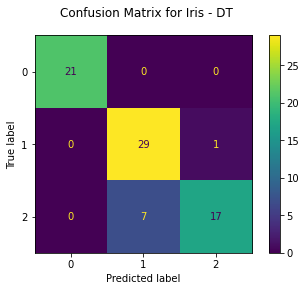

In [20]:
fig = plot_confusion_matrix(dt, X_test, y_test, display_labels=dt.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris - DT")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

pred = knn.predict(X_test)

accuracy_score(y_test, pred)

In [17]:
from sklearn.ensemble import BaggingClassifier

knn = KNeighborsClassifier(n_neighbors=3)

bag = BaggingClassifier(knn, 
                       n_estimators=20,
                       max_samples=0.5)

bag.fit(X_train, y_train)

pred = bag.predict(X_test)

accuracy_score(y_test, pred)

0.96

In [18]:
print(classification_report(y_test, pred, labels=bag.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



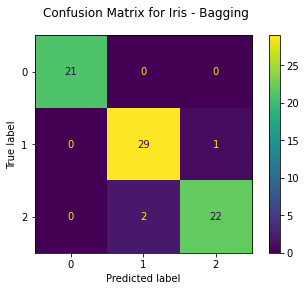

In [28]:
fig = plot_confusion_matrix(bag, X_test, y_test, display_labels=bag.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris - Bagging")
plt.show()

In [21]:
BaggingClassifier?

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20,
                            max_features=0.5)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

accuracy_score(y_test, pred)


0.9583

In [24]:
RandomForestClassifier?

In [57]:
print(classification_report(y_test, pred, labels=rf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       996
           1       0.98      0.99      0.98      1141
           2       0.93      0.97      0.95      1040
           3       0.95      0.92      0.94      1013
           4       0.96      0.97      0.97       962
           5       0.94      0.95      0.94       863
           6       0.97      0.97      0.97       989
           7       0.96      0.95      0.96      1064
           8       0.94      0.94      0.94       963
           9       0.94      0.94      0.94       969

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



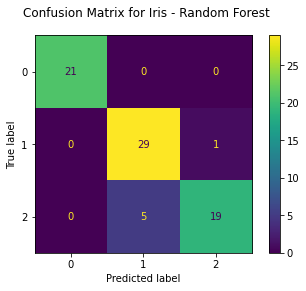

In [27]:
fig = plot_confusion_matrix(rf, X_test, y_test, display_labels=rf.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris - Random Forest")
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(max_depth=2,
                           min_samples_leaf=4,
                           random_state=42)

ada = AdaBoostClassifier(dt, 
                       n_estimators=20)

ada.fit(X_train, y_train)

pred = ada.predict(X_test)

accuracy_score(y_test, pred)


0.96

In [30]:
print(classification_report(y_test, pred, labels=ada.classes_.tolist()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.94      0.97      0.95        30
           2       0.96      0.92      0.94        24

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



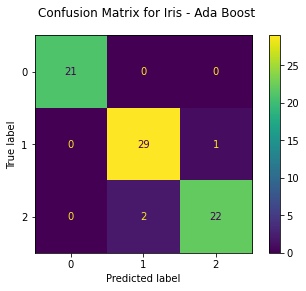

In [31]:
fig = plot_confusion_matrix(ada, X_test, y_test, display_labels=ada.classes_)
fig.figure_.suptitle("Confusion Matrix for Iris - Ada Boost")
plt.show()

In [33]:
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [34]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=1/7, 
                                                    random_state=0)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [45]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [46]:
# feature scaling

X_train = X_train / 255
X_test = X_test / 255

In [47]:
type(X_train)

numpy.ndarray

In [48]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


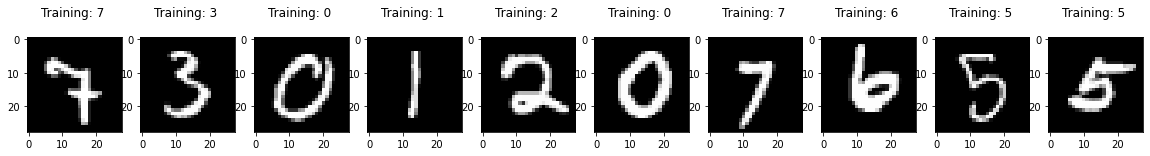

In [49]:
plt.figure(figsize=(20,4))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.gray)
    plt.title("Training: %i \n" % int(y_train.to_numpy()[i]))

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)

bag = BaggingClassifier(knn, 
                       n_estimators=20,
                       max_samples=0.5)

bag.fit(X_train, y_train)

pred = bag.predict(X_test)

accuracy_score(y_test, pred)

0.972

In [52]:
print(classification_report(y_test, pred, labels=bag.classes_.tolist()))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       996
           1       0.96      1.00      0.98      1141
           2       0.98      0.96      0.97      1040
           3       0.97      0.95      0.96      1013
           4       0.98      0.97      0.98       962
           5       0.96      0.97      0.97       863
           6       0.98      0.99      0.98       989
           7       0.97      0.97      0.97      1064
           8       0.98      0.93      0.95       963
           9       0.95      0.97      0.96       969

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



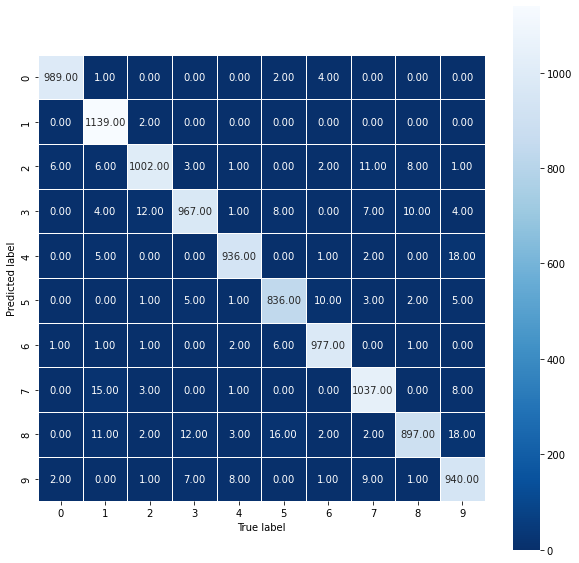

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

In [55]:
rf = RandomForestClassifier(n_estimators=20,
                            max_features=0.5)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

accuracy_score(y_test, pred)

print(classification_report(y_test, pred, labels=rf.classes_.tolist()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       996
           1       0.98      0.99      0.98      1141
           2       0.95      0.97      0.96      1040
           3       0.96      0.93      0.94      1013
           4       0.97      0.96      0.97       962
           5       0.94      0.95      0.95       863
           6       0.97      0.97      0.97       989
           7       0.97      0.96      0.96      1064
           8       0.95      0.94      0.95       963
           9       0.93      0.94      0.93       969

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



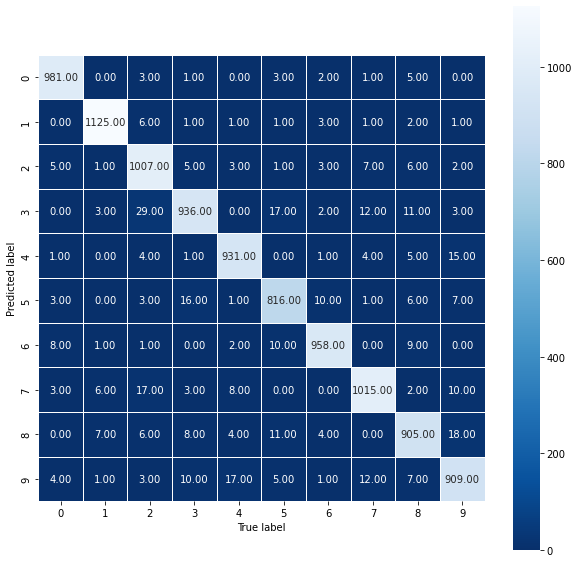

In [58]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

In [59]:
dt = DecisionTreeClassifier(max_depth=2,
                           min_samples_leaf=4,
                           random_state=42)

ada = AdaBoostClassifier(dt, 
                       n_estimators=20)

ada.fit(X_train, y_train)

pred = ada.predict(X_test)

accuracy_score(y_test, pred)

0.7656

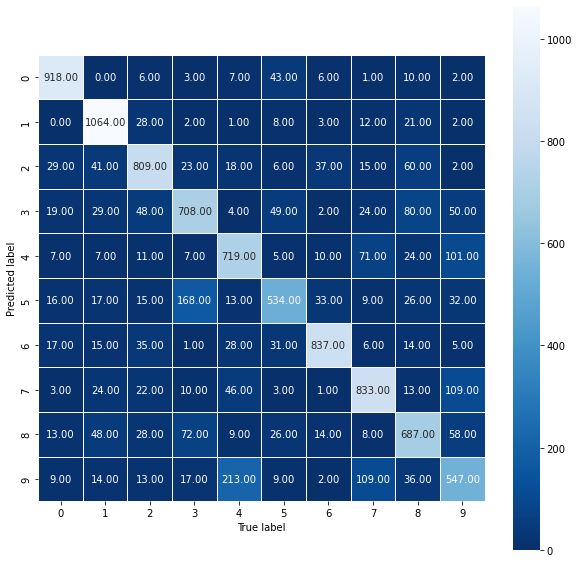

In [60]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

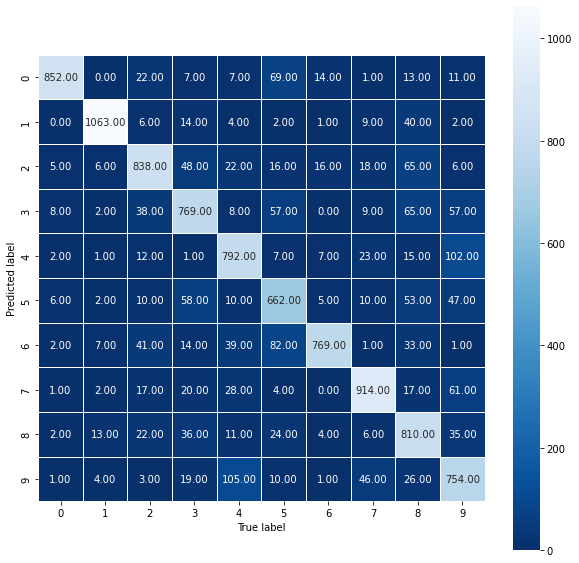

In [64]:
dt = DecisionTreeClassifier(max_depth=5,
                           min_samples_leaf=10,
                           random_state=42)

ada = AdaBoostClassifier(dt, 
                       n_estimators=30)

ada.fit(X_train, y_train)

pred = ada.predict(X_test)

accuracy_score(y_test, pred)

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(10,10))

sns.heatmap(cm, annot=True, fmt='.2f',
           linewidth=0.5, square=True, cmap='Blues_r')

plt.xlabel('True label')
plt.ylabel('Predicted label')

plt.show()

In [65]:
accuracy_score(y_test, pred)

0.8223